# Triển khai .onnx bằng code (cách mình biên dịch ra from cách anh Tú)

https://github.com/Syun1208/Smart_menu_OCR

Use https://netron.app/
Model Properties : 
- producer: PaddlePaddle

- Inputs: x name: x; tensor: float32[-1,3,-1,-1]  (mô hình chấp nhận các kích thước batch, độ phân giải hình ảnh khác nhaum nhưng luôn mong 3 kênh màu RGB)
Outputs: sigmoid_0.tmp_0 name: sigmoid_0.tmp_0; tensor: float32[-1,1,-1,-1]  (tạo ra giá trị kích hoạt sigmoid cho mỗi đầu vào, có thể có độ phân giải khác nhau)

In [1]:
# # Import necessary libraries
# import cv2
# from IPython.display import display, Image
# from yolov8 import Yolov8

# # Set up the Yolo model
# model_path = r"model\road.onnx" # r".\model\road.onnx" # "path_to_your_model.onnx" # Replace with the path to your model
# yolo_model = PaddlePaddle()
# yolo_model.set_up_model(model_path)

# # Read the image 
# frame = cv2.imread(image_path)
# results = yolo_model.inference(frame)



In [2]:
import onnxruntime as ort   # thư viện làm việc với onnx
import numpy as np
import cv2


In [3]:

# Load the ONNX model
model_path = r'models\model_rec.onnx'  
session = ort.InferenceSession(model_path) # print: <onnxruntime.capi.onnxruntime_inference_collection.InferenceSession object at 0x0000022C0F539850>

# # Get model's expected input size
# input_name = session.get_inputs()[0].name  # print: x
 # Create an inference session to get the input details
# input_details =
# session.get_inputs()
# output_details = session.get_outputs()
# print(*input_details)
# print(*output_details)

print(session)

In [4]:
input_metadata = session.get_inputs()[0]
print(input_metadata)

NodeArg(name='x', type='tensor(float)', shape=[None, 3, None, None])


In [6]:
# Read the image 
image_path = r"D:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\mycode\ResearchModel\4.Paddleocr_PaddlePaddle\PaddleOCR\train\crop_image\im0001_4.jpg"
img = cv2.imread(image_path)  # (956, 1276, 3) uint8 3
print(img)
print(img.shape, img.dtype)

[[[157  82   3]
  [150  81   2]
  [143  81   5]
  ...
  [126  75  19]
  [146  80  15]
  [155  83  11]]

 [[157  81   5]
  [143  75   2]
  [130  82  16]
  ...
  [122  85  35]
  [150  89  27]
  [155  87  14]]

 [[159  78  11]
  [139  77  17]
  [168 146  98]
  ...
  [132 123  89]
  [131  79  26]
  [142  80   4]]

 ...

 [[157  82   4]
  [155  80   1]
  [157  82   3]
  ...
  [118 116  75]
  [143  96  35]
  [137  70   1]]

 [[155  79   3]
  [155  79   3]
  [163  87  11]
  ...
  [119  79  27]
  [146  79  16]
  [159  83  11]]

 [[160  83  10]
  [158  81   8]
  [159  81  10]
  ...
  [133  74  18]
  [153  77  11]
  [166  86  15]]]
(12, 31, 3) uint8


In [7]:
import cv2
import numpy as np

# Đọc hình ảnh
# image_path = "your_image_path.jpg"
img = cv2.imread(image_path)

img = cv2.resize(img, (320, 48))

# Chuyển đổi kiểu dữ liệu sang float và chuẩn hóa (nếu cần)
img = img.astype(np.float32) / 255.0

# Thay đổi thứ tự kênh từ BGR sang RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Thay đổi hình dạng để thêm chiều batch và đảo kênh màu
img = np.transpose(img, (2, 0, 1))  # Chuyển từ HWC sang CHW
img = np.expand_dims(img, axis=0)  # Thêm chiều batch

print(img.shape, img.dtype)  # Kết quả sẽ là (1, 3, H, W)

# NodeArg(name='x', type='tensor(float)', shape=[None, 3, None, None])

(1, 3, 48, 320) float32


In [ ]:
img

array([[[[0.01176471, 0.10196079, 0.34901962, ..., 0.1254902 ,
          0.05882353, 0.12941177],
         [0.01176471, 0.12941177, 0.5254902 , ..., 0.09803922,
          0.03137255, 0.2784314 ],
         [0.        , 0.12156863, 0.30588236, ..., 0.18039216,
          0.03921569, 0.2901961 ],
         ...,
         [0.        , 0.14117648, 0.3529412 , ..., 0.04313726,
          0.03137255, 0.27450982],
         [0.00784314, 0.15686275, 0.39607844, ..., 0.05490196,
          0.03137255, 0.28235295],
         [0.00392157, 0.11372549, 0.30980393, ..., 0.02745098,
          0.02745098, 0.24705882]],

        [[0.99607843, 0.9254902 , 0.85882354, ..., 0.7411765 ,
          0.7647059 , 0.90588236],
         [0.99607843, 0.9019608 , 0.85882354, ..., 0.28627452,
          0.44313726, 0.8156863 ],
         [1.        , 0.9098039 , 0.65882355, ..., 0.3254902 ,
          0.42352942, 0.79607844],
         ...,
         [1.        , 0.8980392 , 0.6117647 , ..., 0.2509804 ,
          0.36862746, 0.8

Bug: `RuntimeException: [ONNXRuntimeError] : 6 : RUNTIME_EXCEPTION : Non-zero status code returned while running Add node. Name:'Add_43' Status Message: C:\a\_work\1\s\onnxruntime\core/providers/cpu/math/element_wise_ops.h:540 onnxruntime::BroadcastIterator::Init axis == 1 || axis == largest was false. Attempting to broadcast an axis by a dimension other than 1. 171 by 172`
```
img = cv2.resize(img, (320, 48))     # width, height
# output: (1, 3, 48, 320) float32    # height, width
```
(xem code .pynb file config mới xem được input)

In [10]:
import onnxruntime as ort

# Đường dẫn đến mô hình ONNX
model_path = r'models\model_rec.onnx'  
# Tạo phiên làm việc
session = ort.InferenceSession(model_path)

# Hình ảnh đã được chuẩn bị trước đó
# img là mảng Numpy có hình dạng (1, 3, H, W) và kiểu dữ liệu float32
# Giả sử img là biến chứa hình ảnh của bạn

# Tên của đầu vào mô hình
input_name = session.get_inputs()[0].name

# Chạy mô hình
result = session.run(None, {input_name: img})

# `result` là kết quả đầu ra từ mô hình


In [11]:
print(result)

[array([[[9.9999356e-01, 4.6411208e-10, 4.6411208e-10, ...,
         2.6939439e-11, 3.0204095e-10, 6.8069611e-10],
        [9.9999952e-01, 4.2150974e-11, 4.2150974e-11, ...,
         8.7819926e-13, 5.9837010e-11, 1.5811470e-11],
        [9.9947959e-01, 1.8059455e-10, 1.8059455e-10, ...,
         3.2141661e-12, 4.3247047e-12, 8.7900513e-11],
        ...,
        [9.9979633e-01, 3.0662239e-09, 3.0662239e-09, ...,
         2.6023136e-10, 3.8308956e-14, 2.2714611e-08],
        [9.9992764e-01, 1.3794557e-09, 1.3794557e-09, ...,
         5.9319011e-10, 3.9860102e-13, 3.1962479e-08],
        [9.9950695e-01, 8.9806838e-09, 8.9806838e-09, ...,
         6.0985803e-09, 1.0842493e-11, 1.7297900e-06]]], dtype=float32)]


In [ ]:
result

[array([[[9.9999058e-01, 2.2108303e-10, 2.2108303e-10, ...,
          4.4091963e-11, 7.2908644e-11, 1.7470663e-07],
         [9.9942732e-01, 9.0514429e-11, 9.0514429e-11, ...,
          1.8815192e-11, 5.8281743e-12, 1.2725997e-07],
         [9.9716312e-01, 5.6898691e-10, 5.6898691e-10, ...,
          5.8910565e-10, 5.2930084e-11, 2.4724295e-07],
         ...,
         [6.2271833e-01, 1.6556901e-07, 1.6556901e-07, ...,
          8.5196945e-07, 4.4482681e-06, 2.2573523e-04],
         [9.9261910e-01, 2.1259661e-08, 2.1259661e-08, ...,
          8.2278952e-08, 6.4409875e-08, 3.6616533e-04],
         [9.9852353e-01, 1.6765169e-08, 1.6765169e-08, ...,
          3.4315533e-09, 4.5951390e-10, 2.1179987e-04]]], dtype=float32)]

In [16]:

!python tools/infer/predict_system.py --use_gpu=True --use_onnx=True --drop_score=0.7\
--det_algorithm="DB" --use_mp=True --total_process_num=2 \
--image_dir=r'D:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\mycode\ResearchModel\4.Paddleocr_PaddlePaddle\PaddleOCR\train\debug_train_images' \
--det_model_dir=/content/drive/MyDrive/PPOCR/output/onnx_model/det_ppocrv3_onnx/model_det.onnx  \
--rec_model_dir=/content/drive/MyDrive/PPOCR/output/onnx_model/rec_ppocrv3_onnx/model_rec.onnx \
--rec_char_dict_path="/configs/dictionary/ppocr_dict.txt" \
--draw_img_save_dir='/ONNX' \
--vis_font_path='models\latin.ttf'

usage: predict_system.py [-h] [--use_gpu USE_GPU] [--use_xpu USE_XPU]
                         [--ir_optim IR_OPTIM] [--use_tensorrt USE_TENSORRT]
                         [--min_subgraph_size MIN_SUBGRAPH_SIZE]
                         [--precision PRECISION] [--gpu_mem GPU_MEM]
                         [--image_dir IMAGE_DIR]
                         [--det_algorithm DET_ALGORITHM]
                         [--det_model_dir DET_MODEL_DIR]
                         [--det_limit_side_len DET_LIMIT_SIDE_LEN]
                         [--det_limit_type DET_LIMIT_TYPE]
                         [--det_db_thresh DET_DB_THRESH]
                         [--det_db_box_thresh DET_DB_BOX_THRESH]
                         [--det_db_unclip_ratio DET_DB_UNCLIP_RATIO]
                         [--max_batch_size MAX_BATCH_SIZE]
                         [--use_dilation USE_DILATION]
                         [--det_db_score_mode DET_DB_SCORE_MODE]
                         [--vis_seg_map VIS_SEG_MAP]
       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử output là tensor đầu ra từ mô hình của bạn
output = np.array([[[9.9999058e-01, 2.2108303e-10, ...]]], dtype=float32)

# Chọn kênh đầu tiên (hoặc bất kỳ kênh nào bạn muốn biểu diễn)
heatmap = output[0, 0, :]

# Tạo heatmap
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


NameError: name 'float32' is not defined

In [ ]:
import numpy as np
from PIL import Image

# Giả sử `array_data` là mảng của bạn
# array_data = np.array([[...]])  # Thay thế bằng mảng thực tế của bạn

# Chọn kênh hoặc xử lý mảng ở đây nếu cần

# Chuẩn hóa dữ liệu (ví dụ này giả sử dữ liệu đã nằm trong khoảng 0-1)
image_data = (result * 255).astype(np.uint8)

# Chuyển đổi thành hình ảnh
image = Image.fromarray(image_data)

# Hiển thị hoặc lưu hình ảnh
image.show()  # Hoặc image.save("output.png")


AttributeError: 'list' object has no attribute 'astype'

In [ ]:

# # Resize img chỉ thực hiện trên 2D, 3D nên cần làm trước khi thao tác khác
# side_length = min(img.shape[0], img.shape[1])
# # print(side_length)
# img = cv2.resize(img, (side_length, side_length))



In [ ]:


# #1. Convert the image to float32, (if ko có: Unexpected input, actual: (tensor(unit(8)), expected tensor(float))
# img = img.astype('float32')     # (956, 1276, 3) float32 3

# #2. Add an extra dimension   (Nếu ko có thì: INVALID_ARGUMENT: invalid rank for input x. Got 3 expected 4)
# img = np.expand_dims(img, axis=0)    # (1, 956, 1276, 3) float32 1276
# # Add an Extra Dimension: You added an extra dimension to the image to make it a batch of images.
# #  The shape becomes (1, 956, 1276, 3), which is (batch_size, height, width, channels).

# # 3. INVALID_ARGUMENT : Got invalid dimensions for input: x for the following indices index: 1 Got: 956 Expected: 3
# # Most likely, your model expects the input in a different order,
# #  probably (batch_size, channels, height, width).
# # img = np.transpose(img, (2, 0, 1)) # Use numpy.transpose to reorder the dimensions.
# img = np.transpose(img, (0, 3, 1, 2))  # Rearrange to (batch_size, channels, height, width) # (1, 3, 956, 1276) float32 956

# # Print image information
# if img is not None:
#     print("Image Dimensions : ", img.shape)  # Height, Width, Channels
#     print("Image Data Type  : ", img.dtype)
#     print("Number of Channels: ", img.shape[2] if len(img.shape) > 2 else 1)
#     print(img.shape, img.dtype, img.shape[2] if len(img.shape) > 2 else 1)
# else:
#     print("Error: Image not loaded.")


Image Dimensions :  (1, 3, 1364, 1364)
Image Data Type  :  float32
Number of Channels:  1364
(1, 3, 1364, 1364) float32 1364


In [ ]:

# # Run the model
# outputs = session.run(None, {input_name: img})
# output = outputs[0] # The output is typically a tensor of shape [-1, 1, -1, -1]


RuntimeException: [ONNXRuntimeError] : 6 : RUNTIME_EXCEPTION : Non-zero status code returned while running Add node. Name:'Add_43' Status Message: C:\a\_work\1\s\onnxruntime\core/providers/cpu/math/element_wise_ops.h:540 onnxruntime::BroadcastIterator::Init axis == 1 || axis == largest was false. Attempting to broadcast an axis by a dimension other than 1. 171 by 172


RuntimeException                          Traceback (most recent call last)
d:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\mycode\PaddleOCR-Vietnamese-Pretrained.ipynb Cell 8 line 2
      1 # Run the model
----> 2 outputs = session.run(None, {input_name: img})
      3 output = outputs[0] # The output is typically a tensor of shape [-1, 1, -1, -1]

File c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:220, in Session.run(self, output_names, input_feed, run_options)
    218     output_names = [output.name for output in self._outputs_meta]
    219 try:
--> 220     return self._sess.run(output_names, input_feed, run_options)
    221 except C.EPFail as err:
    222     if self._enable_fallback:

RuntimeException: [ONNXRuntimeError] : 6 : RUNTIME_EXCEPTION : Non-zero status code returned while running Add node. Name:'Add_44' Status Message: C:\a\_work\1\s\onnxruntime\core/providers/cpu/math/element_wise_ops.h:540 onnxruntime::BroadcastIterator::Init axis == 1 || axis == largest was false. Attempting to broadcast an axis by a dimension other than 1. 319 by 320

Lỗi mà bạn gặp phải khi chạy model ONNX là do sự không tương thích giữa đầu vào của model và dữ liệu bạn cung cấp. Lỗi `RuntimeException` với thông báo:

```
Non-zero status code returned while running Add node. Name:'Add_44' Status Message: C:\a\_work\1\s\onnxruntime\core/providers/cpu/math/element_wise_ops.h:540 onnxruntime::BroadcastIterator::Init axis == 1 || axis == largest was false. Attempting to broadcast an axis by a dimension other than 1. 319 by 320
```

cho thấy có vấn đề với quá trình broadcast (phát sóng) trong một phép toán cộng. Điều này thường xảy ra khi kích thước của tensor đầu vào không phù hợp với những gì model mong đợi. Để khắc phục lỗi này, bạn cần đảm bảo rằng tensor đầu vào của bạn phải có kích thước phù hợp với model.

Dựa trên thông tin bạn cung cấp, có vẻ như model của bạn mong đợi dữ liệu đầu vào có kích thước cụ thể. Bạn đã thực hiện một số thao tác như chuyển đổi kiểu dữ liệu, thêm một chiều (batch size), và sắp xếp lại các kênh màu. Tuy nhiên, có thể model của bạn cần thêm bước xử lý hoặc cần dữ liệu đầu vào với kích thước cụ thể.

Để chẩn đoán và sửa lỗi này, bạn có thể thử các bước sau:

1. **Kiểm Tra Kích Thước Đầu Vào Mong Đợi của Model**: Sử dụng `session.get_inputs()[0].shape` để xác định kích thước chính xác mà model mong đợi. Điều này sẽ giúp bạn hiểu cần phải điều chỉnh kích thước của ảnh như thế nào.

2. **Điều Chỉnh Kích Thước Ảnh**: Nếu kích thước ảnh không phù hợp, sử dụng OpenCV hoặc Numpy để thay đổi kích thước ảnh trước khi đưa vào model. 

3. **Kiểm Tra Preprocessing**: Đảm bảo rằng các bước tiền xử lý (như chuẩn hóa, trừ mean, v.v.) phù hợp với yêu cầu của model.

Nếu bạn có thể cung cấp thêm thông tin về đầu vào mong đợi của model (như kích thước tensor đầu vào), tôi có thể giúp bạn chi tiết hơn trong việc điều chỉnh code.

Cảm ơn bạn đã cung cấp thông tin chi tiết về model ONNX. Dựa vào thông tin này, model của bạn mong đợi đầu vào là tensor với kích thước [-1, 3, -1, -1], nghĩa là:

- Chiều đầu tiên (-1) là kích thước batch, có thể thay đổi.
- Chiều thứ hai (3) là số kênh màu, ở đây là 3, tương ứng với màu RGB.
- Hai chiều cuối cùng (-1, -1) là chiều cao và rộng của hình ảnh, có thể thay đổi.

Do đó, có vẻ như bạn đã xử lý đúng các bước cần thiết để chuẩn bị dữ liệu đầu vào cho model. Bạn đã chuyển đổi kiểu dữ liệu của ảnh thành float32, thêm một chiều cho batch size, và sắp xếp lại các kênh màu để có tensor có hình dạng (1, 3, chiều cao, chiều rộng).

Tuy nhiên, lỗi bạn gặp phải có thể xuất phát từ việc kích thước của ảnh không tương thích với mô hình. Lỗi "broadcast" xảy ra khi kích thước của tensor không phù hợp để thực hiện phép toán (ví dụ: phép cộng) giữa các tensor.

Để giải quyết lỗi này, bạn có thể thử các bước sau:

1. **Kiểm Tra Kích Thước của Ảnh**: Đảm bảo rằng kích thước của ảnh (chiều cao và chiều rộng) phù hợp với những gì mà model có thể xử lý. Nếu cần, hãy thay đổi kích thước của ảnh để phù hợp hơn.

2. **Điều Chỉnh Preprocessing Đầu Vào**: Nếu model yêu cầu bất kỳ bước chuẩn bị đặc biệt nào cho dữ liệu đầu vào (như chuẩn hóa, trừ mean, v.v.), hãy đảm bảo rằng bạn thực hiện những bước này trước khi đưa ảnh vào model.

3. **Xem Xét Đầu Ra của Model**: Đảm bảo bạn hiểu và xử lý đúng đầu ra của model. Trong trường hợp này, model trả về giá trị kích hoạt sigmoid, bạn cần xử lý kết quả này phù hợp với nhu cầu của bạn.

Nếu bạn thử những bước trên và vẫn gặp lỗi, hãy cung cấp thêm thông tin về cách bạn xử lý ảnh và đầu ra của model, tôi có thể giúp bạn chi tiết hơn.

tôi thấy node Add_44 rồi, 
Name:'Add_44' Status Message: C:\a\_work\1\s\onnxruntime\core/providers/cpu/math/element_wise_ops.h:540 onnxruntime::BroadcastIterator::Init axis == 1 || axis == largest was false. Attempting to broadcast an axis by a dimension other than 1. 319 by 320

là sao? 

Thông điệp lỗi mà bạn đã nhận được khi chạy mô hình ONNX của bạn trên ONNX Runtime cung cấp thông tin quan trọng về vấn đề bạn đang gặp phải. Hãy phân tích thông điệp lỗi này:

1. **Node Gây Lỗi**: Node gây ra lỗi được định danh là `Add_44`, cho thấy rằng lỗi xảy ra trong một hoạt động cộng.

2. **Thông Điệp Lỗi**: Phần thông điệp lỗi "Attempting to broadcast an axis by a dimension other than 1. 319 by 320" chỉ ra rằng một trong các tensor đầu vào của hoạt động cộng này đang cố gắng thực hiện broadcasting trên một trục có kích thước khác với 1. Trong trường hợp này, có vẻ như mô hình đang cố gắng broadcast một tensor có kích thước 319 trên một trục mà tensor kia có kích thước là 320.

3. **Ý Nghĩa của Lỗi**: Broadcasting trong ONNX và các thư viện tính toán tensor như NumPy cho phép mở rộng tự động các tensor nhỏ hơn để phù hợp với kích thước của tensor lớn hơn trong các phép toán như cộng, nhân, v.v. Tuy nhiên, điều này chỉ hoạt động khi kích thước của tensor nhỏ hơn là 1 ở các trục cần broadcast. Trong trường hợp này, lỗi xảy ra vì một trục có kích thước 319 không thể tự động được mở rộng để phù hợp với kích thước 320.

4. **Giải Quyết Lỗi**: Để giải quyết vấn đề này, bạn cần đảm bảo rằng các tensor đầu vào của node `Add_44` có kích thước tương thích với nhau. Nếu mục đích là sử dụng broadcasting, thì kích thước của tensor nhỏ hơn ở trục cần broadcast phải là 1, hoặc bạn cần thực hiện các bước tiền xử lý để đưa chúng về kích thước tương thích trước khi thực hiện phép cộng.

Bạn có thể kiểm tra chi tiết các tensor đầu vào của node `Add_44` trong mô hình ONNX của bạn để xác định cách tốt nhất để giải quyết vấn đề này.

Khi nói đến "broadcasting" trong ngữ cảnh của mạng neuron và xử lý tensor, chúng ta đang nói về một cơ chế tự động mở rộng dữ liệu của tensor nhỏ hơn để phù hợp với kích thước của tensor lớn hơn trong quá trình thực hiện các phép toán như cộng hoặc nhân. Một "trục" trong tensor là một chiều của nó, như chiều rộng, chiều cao, hoặc số kênh trong ảnh.

Đối với broadcasting, điều quan trọng là:

- **Kích Thước Tensor Nhỏ Hơn Ở Trục Cần Broadcast Là 1**: Nghĩa là trong tensor nhỏ hơn, kích thước của trục cụ thể đó phải là 1. Điều này cho phép tensor đó được "mở rộng" tự động để phù hợp với kích thước của tensor lớn hơn trên trục đó.

Ví dụ:

- Giả sử bạn có hai tensor A và B. A có kích thước [1, 3, 4, 4] và B có kích thước [2, 3, 4, 4].
- Ở đây, tensor A có thể được broadcast trên trục đầu tiên từ kích thước 1 lên 2 để phù hợp với kích thước của B.
- Kết quả là, A sẽ được coi như có kích thước [2, 3, 4, 4] trong quá trình phép toán, mặc dù dữ liệu thực tế của nó không thay đổi, chỉ được lặp lại.

Trong trường hợp lỗi mà bạn đang gặp phải, có vẻ như một trong các tensor đầu vào của node `Add_44` có trục với kích thước 319, trong khi tensor kia có trục tương ứng với kích thước 320. Điều này không phù hợp với quy tắc broadcasting vì để thực hiện broadcasting, kích thước của tensor nhỏ hơn trên trục cụ thể đó phải là 1.

Để làm rõ vấn đề bạn đang gặp phải trong quá trình broadcasting ở node `Add_44` trong mô hình ONNX của bạn:

1. **Tensor Đầu Vào của Node `Add_44`**: Node `Add_44` có ít nhất hai tensor đầu vào để thực hiện phép cộng. Trong trường hợp của bạn, có vẻ như hai tensor này có kích thước không tương thích trên một trục cụ thể.

2. **Kích Thước Của Các Trục**: Một trong các tensor đầu vào có một trục với kích thước 319, trong khi tensor kia có trục tương ứng với kích thước 320. Điều này tạo ra sự không tương thích vì kích thước của mỗi trục trong mỗi tensor đầu vào phải giống nhau hoặc một trong chúng phải có kích thước là 1 để có thể thực hiện broadcasting một cách hợp lệ.

3. **Ý Nghĩa của Lỗi**: Lỗi bạn nhận được chỉ ra rằng có sự không phù hợp trong việc thực hiện broadcasting giữa hai tensor đầu vào này. Trong ONNX và hầu hết các thư viện xử lý tensor, để broadcasting có thể xảy ra, kích thước của tensor nhỏ hơn trên trục cụ thể phải là 1. Nếu không, tensor nhỏ hơn không thể được tự động mở rộng để phù hợp với tensor lớn hơn.

4. **Giải Pháp**: Bạn cần đảm bảo rằng kích thước của các tensor đầu vào cho node `Add_44` phù hợp với nhau. Điều này có thể đòi hỏi việc chỉnh sửa cấu trúc mô hình hoặc xử lý trước dữ liệu đầu vào để đảm bảo rằng chúng có kích thước tương thích.

Nói cách khác, bạn cần kiểm tra và chỉnh sửa kích thước của các tensor đầu vào trước khi chúng được đưa vào node `Add_44` để đảm bảo chúng tương thích với nhau hoặc thực hiện các bước cần thiết để cho phép broadcasting diễn ra một cách hợp lệ.

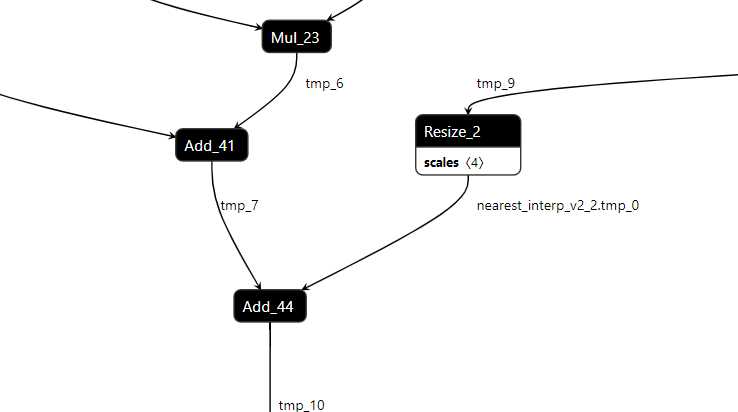

- Add_44: Node Properties, inputs: A name: tmp_7 và B name: nearest_interp_v2_2.tmp_0
- Connection Properties: name tm_7, input form node Add_41, output: to node Add_41. 
- Connection Properties: name nearest_interp_v2_2.tmp_0, input form node Resize to node Resize_2, output: to node Add_41. 

- Add_41 Node Properties: output: name tm_7
- Resize_2, scales<4> Node Properties: (type Resize) name Resize_2, Attributes: mode nearest, Outputs: name nearest_interp_v2_2.tmp_0

Dựa trên thông tin bạn cung cấp, hãy phân tích quá trình dẫn đến lỗi ở node `Add_44` trong mô hình ONNX của bạn:

1. **Node `Add_44`**:
   - Đầu vào A: Tên `tmp_7`, đến từ node `Add_41`.
   - Đầu vào B: Tên `nearest_interp_v2_2.tmp_0`, đến từ node `Resize_2`.

2. **Node `Add_41`**:
   - Đầu ra `tmp_7` được sử dụng làm đầu vào cho node `Add_44`.

3. **Node `Resize_2`**:
   - Loại: Resize với thuộc tính `mode` là nearest.
   - Đầu ra `nearest_interp_v2_2.tmp_0` được sử dụng làm đầu vào cho node `Add_44`.

Dựa trên cấu trúc này, đây là những điểm cần chú ý:

- **Xử Lý Tensor trong Node `Add_44`**: Lỗi broadcasting xảy ra ở node `Add_44` có thể là do kích thước không tương thích của tensor `tmp_7` và `nearest_interp_v2_2.tmp_0`.

- **Kích Thước Tensor sau Resize**: Vì `nearest_interp_v2_2.tmp_0` là kết quả của một hoạt động resize, có khả năng rằng kích thước của tensor này sau khi resize không khớp với kích thước của tensor `tmp_7`.

- **Kiểm Tra Kích Thước Tensor**: Bạn cần kiểm tra kích thước cụ thể của cả hai tensor đầu vào này trước khi chúng đến node `Add_44`. Nếu có sự không khớp, bạn cần đảm bảo rằng chúng được điều chỉnh sao cho phù hợp với nhau hoặc rằng kích thước của tensor nhỏ hơn phải có trục với kích thước là 1 để broadcasting có thể diễn ra một cách hợp lệ.

- **Điều Chỉnh Hoạt Động Resize**: Nếu lỗi xuất phát từ node `Resize_2`, bạn có thể cần điều chỉnh cách thức resize tensor để đảm bảo kích thước sau khi resize phù hợp với tensor `tmp_7`.

Để giải quyết vấn đề, bạn nên kiểm tra và so sánh kích thước của tensor `tmp_7` và `nearest_interp_v2_2.tmp_0` và đảm bảo rằng chúng có kích thước tương thích hoặc điều chỉnh quá trình xử lý tensor để đạt được sự phù hợp cần thiết.

In [ ]:
import onnxruntime as ort

import onnx

# Load the ONNX model
model_path = 'model/model_det.onnx'
model = onnx.load(model_path)

# Function to print information of a node
def print_node_info(model, node_name):
    for node in model.graph.node:
        if node.name == node_name:
            print(f"Node Name: {node.name}")
            print("Input Tensors:", node.input)
            print("Output Tensors:", node.output)

# Print information for specific nodes
print_node_info(model, "Add_41")
print_node_info(model, "Resize_2")
print_node_info(model, "Add_44")

# Compare sizes of tmp_7 and nearest_interp_v2_2.tmp_0
# You will need to extract these tensors from the model and compare their shapes


Node Name: Add_41
Input Tensors: ['conv2d_114.tmp_0', 'tmp_6']
Output Tensors: ['tmp_7']
Node Name: Resize_2
Input Tensors: ['tmp_9', 'Constant_50']
Output Tensors: ['nearest_interp_v2_2.tmp_0']
Node Name: Add_44
Input Tensors: ['tmp_7', 'nearest_interp_v2_2.tmp_0']
Output Tensors: ['tmp_10']


# Triển khai .onnx bằng cmd  (cách anh Tú) 

In [ ]:
#predict detection
%cd /content/PaddleOCR-Vietnamese
!python ./tools/infer/predict_det.py --det_algorithm="SAST" --use_gpu=True \
                                    --det_model_dir="./inference/SAST"  \
                                    --image_dir=./train/vietnamese/unseen_test_images/im1520.jpg